<a href="https://colab.research.google.com/github/vadim-vic/Causal-Inference/blob/main/code_posterior/SSA_minimum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#---
def vec2hankel(vec, ncols):
  hankel = np.empty((len(vec)-ncols+1, ncols))
  for i in range(len(hankel)):
    hankel[i] = vec[i:i+ncols]
  return hankel
#---
def hankel2vec(hankel):
  nrows, ncols = hankel.shape
  vec = np.zeros((nrows+ncols-1))
  # first upper triangle of the hankel matrix
  for i in range(ncols):
    vec[i] = np.trace(np.flip(hankel[0:0+ncols,:], axis=0), offset= -ncols+1+i )/(i+1)
    #print(i, vec[i])
  # the body of the matrix
  for i in range(ncols+1,nrows):
    vec[i-1] = np.trace(np.flip(hankel[i-ncols:i,:], axis=0))/ncols
    #print(i, vec[i])
  # the rest of the matrix
  for i in range(nrows,nrows+ncols):
    vec[i-1] = np.trace(np.flip(hankel[nrows-ncols:nrows,:], axis=0), offset= -nrows+i )/(ncols+nrows-i)
    #print(nrows-ncols,nrows, -nrows+i, ncols+nrows-i)
    #print(hankel[nrows-ncols:nrows,:])
    #print(i, vec[i])
  return vec
#---
def ssa(vec, ncols, ncomps):
  h  = vec2hankel(vec,ncols)
  u, s, vt = np.linalg.svd(h)
  # Reconstruct the first ncomps SVD sigular values
  h1 = u[:,0:ncomps] @ np.diag(s[0:ncomps]) @ vt[0:ncomps,:]
  hr = u[:,0:ncomps] @ np.diag(s[0:ncomps]) # @ vt[0:ncomps,:] # Suppress rotation
  # Reconstruct the sourse vector of the same length
  x1 = hankel2vec(h1)
  # Return both the hankel matrix and the vector
  return x1, h1, hr

-0.06052592409030344


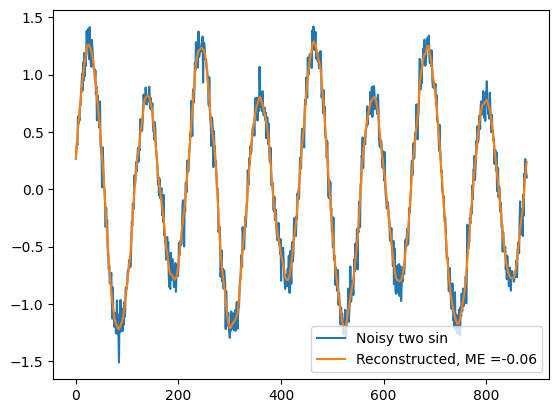

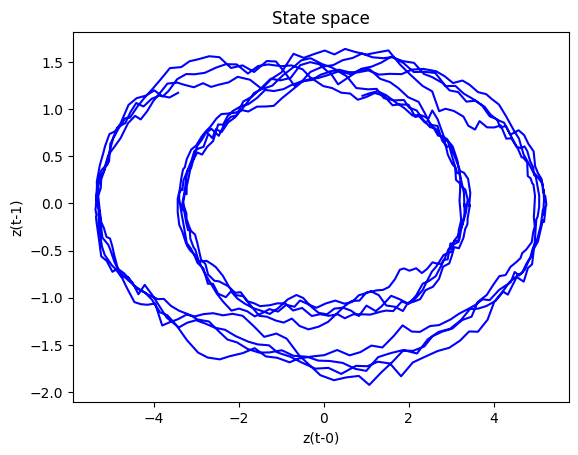

In [ ]:
# Test series one
x = np.array([1,2,3,4,5,6,7,8,9])
# Test series two
x = np.array(np.arange(101, 128))
# Test series periodic signal
x = np.linspace(0, 16*np.pi, 880)
x = np.sin(x)  + 0.3 * np.cos(x/2) + np.random.normal(0, 0.1, size=len(x))
#---
ncols  = 20
ncomps = 3
x1, h1, _  = ssa(x, ncols, ncomps)
print(np.sum(x-x1))

plt.plot(x, label='Noisy two sin')
plt.plot(x1, label= f'Reconstructed, ME ={round(np.sum(x-x1),2)}')
plt.legend()
plt.show()
#---
x1, h1, hr  = ssa(x, ncols, 2) # To plot the phase
fig, ax = plt.subplots()
#ax.scatter(h1[:,0], h1[:,1])
ax.plot(hr[:,0], hr[:,1], 'b-')
#---
ax.set_title("State space")
ax.set_xlabel("z(t-0)")
ax.set_ylabel("z(t-1)")
plt.show()
